In [52]:
%matplotlib inline
from sys import path
path.append("/Users/yangjunjie/work/bs-uhf/src/")

import numpy
import scipy
from numpy import load
import matplotlib as mpl
from matplotlib import pyplot as plt

from plot_utils import read_data_from_h5
from plot_utils import colors

In [53]:
data_dict = read_data_from_h5("/Users/yangjunjie/work/bs-uhf/data/h2/sto-3g/data.h5")

label_list = []
label_list.append("ene_fci")
label_list.append("ene_rhf")
label_list.append("ene_uhf")
label_list.append("ene_ump2")
label_list.append("ene_ucisd")
label_list.append("ene_noci_uhf")
label_list.append("ene_noci_ump2_1")
label_list.append("ene_noci_ump2_2")
label_list.append("ene_noci_ucisd_1")
label_list.append("ene_noci_ucisd_2")

style_dict = {}
for i, label in enumerate(label_list):
    label_split = label.split("_")

    if len(label_split) == 2:
        plot_label = label_split[1].upper()

    else:
        plot_label = "-".join(label_split[1:]).upper()

    if plot_label == "FCI":
        style_dict[label] = {
            "marker": "None",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": plot_label,
        }

    elif plot_label.split("-")[0] == "NOCI":
        style_dict[label] = {
            "marker": "o",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": plot_label,
        }

    else:
        style_dict[label] = {
            "marker": "o",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": plot_label,
        }

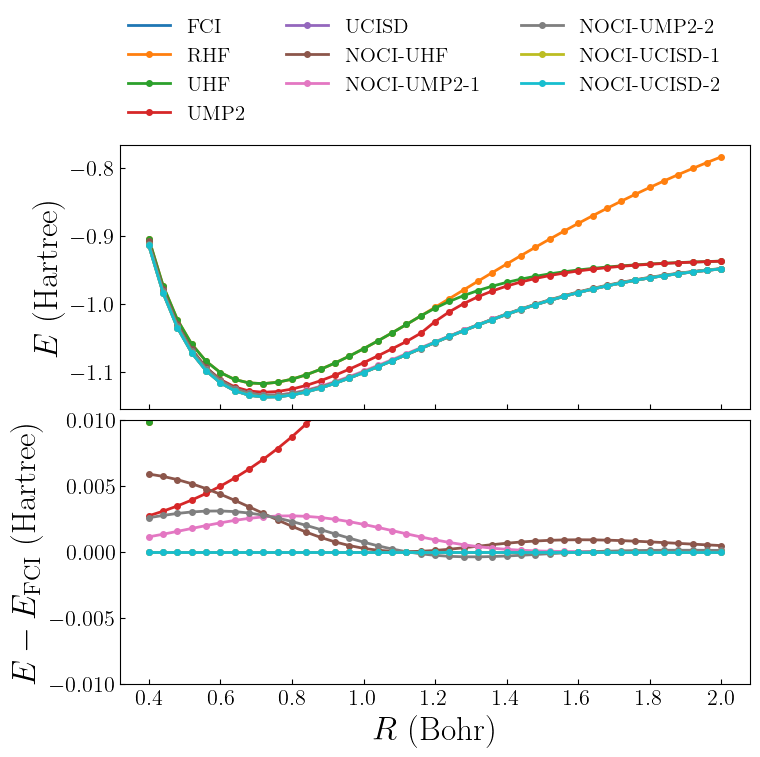

In [54]:
fig, axs = plt.subplots(2, 1, figsize=(8,8), sharex=True)

ax = axs[0]
for i, label in enumerate(label_list):
    ax.plot(
        data_dict[label][:,0], 
        data_dict[label][:,1] + data_dict["ene_nuc"][:,1],
        **style_dict[label])

ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
          edgecolor='silver', frameon=False, fontsize=15, ncol=3)

ax.set_ylabel(r"$E$ (Hartree)")

ax = axs[1]
for i, label in enumerate(label_list):
    ax.plot(
        data_dict[label][:,0], 
        data_dict[label][:,1] - data_dict["ene_fci"][:,1],
        **style_dict[label])

ax.set_ylabel(r"$E - E_{\rm FCI}$ (Hartree)")
ax.set_xlabel(r"$R$ (Bohr)")
ax.set_ylim(-0.01, 0.01)

fig.tight_layout(w_pad=0.1, h_pad=0.1)